<a href="https://colab.research.google.com/github/matsumotoshintaro/Hello-World/blob/master/%E4%BF%AE%E8%AB%963_Class__%E5%82%BE%E6%96%9C%E8%A7%92%E4%BD%9C%E3%82%8B%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install  numpy-stl
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
from stl import mesh
from sklearn.metrics import mean_squared_error

In [ ]:
 class SanjigenFukugen:
    def __init__(self, name, n2, n1, m2, m1): # コンストラクタでインスタンスを初期化
        self.name = name
        self.n2 = n2
        self.n1 = n1
        self.m2 = m2
        self.m1 = m1        

    def print_image(self,rotate):
        plt.figure(figsize=(7,5))
        im = Image.open(self.name)
        im = im.rotate(rotate)
        im = np.array(im)
        self.Z = im[self.n1:self.n2,self.m1:self.m2]
        imgplot = plt.imshow(self.Z, cmap = "gray")

            
    def make_ravel(self):
        self.Z = self.Z.ravel()

    def make_X(self):
        self.X = []
        X1 = [x for x in range(self.n2-self.n1)]
        for n in range(self.m2-self.m1):
            self.X.extend(X1)

    def make_Y(self):
        self.Y = []
        for n in range(self.m2-self.m1):
            for m in range(self.n2-self.n1):
                Y1 = [n]
                self.Y.extend(Y1)

    def print_3D(self):
        self.make_X()
        self.make_Y()
        fig = plt.figure(figsize=(7,5))
        ax = Axes3D(fig)
        angle=45
        ax.view_init(45, angle)
        ax.plot(self.X,self.Y,self.Z,marker=".",linestyle='None',markersize=1,color='gray')
        plt.show()
            
    def make_mini(self, size, K):             
            self.size = size
            self.K = K
            self.n3 = int((self.n2-self.n1)/self.size)
            self.m3 = int((self.m2-self.m1)/self.size)
            self.Z_mini = []
            for m in range(self.m3):
                for n in range(self.n3):
                    Z_mini_kari = []
                    for b in range(self.size):
                        for a in range(self.size):
                            Z_mini_kari.append(self.Z[(a+self.size*n)+(self.size*self.n3*(b+self.size*m))]/self.K)
                    self.Z_mini.append(np.average(Z_mini_kari))

            X1 = [x for x in range(self.n3)]
            self.X_mini = []
            for n in range(self.m3):
                self.X_mini.extend(X1)

            self.Y_mini = []
            for n in range(self.m3):
                for m in range(self.n3):
                    Y1 = [n]
                    self.Y_mini.extend(Y1)

            fig = plt.figure(figsize=(7,5))
            ax = Axes3D(fig)
            angle=45

            ax.set_xlabel("X")
            ax.set_ylabel("Y")
            ax.set_zlabel("Z")
            ax.view_init(45, angle)
            ax.plot(self.X_mini,self.Y_mini ,self.Z_mini,marker=".",linestyle='None',markersize=5,color='gray')
 
    def make_stl(self, a, b, c):
            stl = [a, b, c]
            self.STL.append(stl)        

    def make_STL(self,chosei):
            self.STL = []
            for m in range(self.m3):
                for n in range(self.n3):
                    a = n
                    b = m
                    c = 2*self.Z_mini[b*(self.n3)+a]-chosei
                    self.make_stl(a,b,c)
                    self.make_stl(a,b,0)
                    self.make_stl(a+1,b,c)
                    self.make_stl(a,b+1,c)

                    self.make_stl(a,b,c)
                    self.make_stl(a+1,b+1,c)
                    self.make_stl(a+1,b,c)
                    self.make_stl(a,b+1,0)

                    self.make_stl(a+1,b+1,c)
                    self.make_stl(a,b+1,0)
                    self.make_stl(a+1,b,0)
                    self.make_stl(a+1,b+1,0)

                    self.make_stl(a+1,b,c)
                    self.make_stl(a,b,c)
                    self.make_stl(a+1,b+1,c)
                    self.make_stl(a+1,b,0)

            self.faces = []
            for n in range((self.n3)*(self.m3)*4):
                self.faces.append([0+4*n,1+4*n,2+4*n])
                self.faces.append([0+4*n,1+4*n,3+4*n])
                self.faces.append([0+4*n,2+4*n,3+4*n])
                self.faces.append([1+4*n,2+4*n,3+4*n])

            self.vertices = np.array(self.STL)

            self.faces = np.array(self.faces)

            self.obj= mesh.Mesh(np.zeros(self.faces.shape[0], dtype=mesh.Mesh.dtype))
            for i, f in enumerate(self.faces):
                for j in range(3):
                    self.obj.vectors[i][j] = self.vertices[f[j],:]
            self.obj.save('data1.stl')
            

    def print_2D(self, s):
            self.Z_2d = [] 
            for n in range(self.m3):
                self.Z_2d.append(self.Z_mini[s+self.n3*n])

            self.Y_2d = [n for n in range(self.m3)]
            self.grady = np.gradient(self.Z_2d)
            self.absgrady = np.abs(self.grady)
            
            #plt.plot(self.Y_2d, self.Z_2d, color='gray')
            #plt.show()
            #plt.plot(self.Y_2d, self.grady)
            #plt.show()

            
            
    def make_dy0(self):
      #分割するポイントのリストを作成
                leny = len(self.Z_2d)
                self.dy_0 = [0]
                for n in range(leny-1):
                    if self.grady[n]*self.grady[n+1]<0:
                        self.dy_0.append(n)
                self.dy_0.append(leny)

                self.dy0 = [0]
                for n in range(len(self.dy_0)-1):
                    if self.dy_0[n+1]-self.dy_0[n]>1:
                        self.dy0.append(self.dy_0[n+1])
            
    def make_index(self):
      #正負のパターンを作成
            data = [1, -1]
            self.index = []
            for n in range(len(self.dy0)-1):
                index_kari = []
                for m in range(2**n):
                    for l in data:
                        for o in range(2**(len(self.dy0)-(2+n))):
                            index_kari.append(l)
                self.index.append(index_kari)
            a = len(self.index)
            b = len(self.index[0])
            self.inindex = []
            for n in range(b):
                inindex_kari = []
                for m in range(a):
                    inindex_kari.append(self.index[m][n])
                self.inindex.append(inindex_kari)

    def patterns(self) :
            self.Z_p = []

            for n in range(2**(len(self.dy0)-1)):
                index_1 = self.inindex[n]
                grady_new = []
                for n in range(len(self.dy0)-1):
                    y_1 = self.Z_2d[self.dy0[n]:self.dy0[n+1]]
                    grady_1 = np.gradient(y_1)
                    absgrady_1 = np.abs(grady_1)
                    grady_new = np.concatenate([grady_new, absgrady_1*index_1[n]])
                self.Z_p.append(grady_new)
          # for n in range(2**(len(dy_0)-1)):
                #plt.plot(x,Z[n])
                #plt.show()
        
    def integral(self):  
                leny = len(self.Z_p[0])
                self.a = []
                self.Z_integral = []
                for m in tqdm(range(2**(len(self.dy0)-1))):
                    y = self.Z_p[m]
                    Y = []
                    y1 = 0

                    for n in range(leny):
                        y1 = y1 + y[n]
                        Y.append(y1)
                    if Y[int(leny/2)]>=0:
                        self.Z_integral.append(Y)
                    else :
                        for p in range(len(Y)):
                            Y[p] = -1*Y[p] 
                        self.Z_integral.append(Y)
                    #plt.plot(Y,color='gray')
                    #plt.show()
                    self.a.append(np.abs(Y[leny-1]))
 
    def go(self):
            #plt.plot(x,y)
            #plt.show()
            #print('koko')
            plt.plot(self.Z_integral[np.argmin(self.a)],color='gray')
            plt.show()
            return self.Z_integral[np.argmin(self.a)]

    def make_answer(self):
      self.Z_integral_all = []
      for n in tqdm(range(self.n3)):
          fukugen.print_2D(n)
          fukugen.make_dy0()
          fukugen.make_index()
          fukugen.patterns()
          fukugen.integral()
          Z_integral_all_kari = fukugen.go()

          self.Z_integral_all.append(Z_integral_all_kari)
          print(len(self.Z_integral_all),"a")
          print(len(self.Z_integral_all[0]),"b")
      self.Z_Z = np.array(self.Z_integral_all).ravel()

    def print_Last(self,an_x, an_y):
        fig = plt.figure(figsize=(7,5))
        ax = Axes3D(fig)
        angle=an_x
        ax.view_init(an_y, angle)
        ax.plot(self.X_mini,self.Y_mini,self.Z_Z,marker=".",linestyle='None',markersize=5,color='gray')
        plt.show()

    def make_STL_Last(self,chosei):
            self.STL = []
            for m in range(self.m3):
                for n in range(self.n3):
                    a = n
                    b = m
                    c = 2*self.Z_Z[b*(self.n3)+a]-chosei
                    self.make_stl(a,b,c)
                    self.make_stl(a,b,0)
                    self.make_stl(a+1,b,c)
                    self.make_stl(a,b+1,c)

                    self.make_stl(a,b,c)
                    self.make_stl(a+1,b+1,c)
                    self.make_stl(a+1,b,c)
                    self.make_stl(a,b+1,0)

                    self.make_stl(a+1,b+1,c)
                    self.make_stl(a,b+1,0)
                    self.make_stl(a+1,b,0)
                    self.make_stl(a+1,b+1,0)

                    self.make_stl(a+1,b,c)
                    self.make_stl(a,b,c)
                    self.make_stl(a+1,b+1,c)
                    self.make_stl(a+1,b,0)

            self.faces = []
            for n in range((self.n3)*(self.m3)*4):
                self.faces.append([0+4*n,1+4*n,2+4*n])
                self.faces.append([0+4*n,1+4*n,3+4*n])
                self.faces.append([0+4*n,2+4*n,3+4*n])
                self.faces.append([1+4*n,2+4*n,3+4*n])

            self.vertices = np.array(self.STL)

            self.faces = np.array(self.faces)

            self.obj= mesh.Mesh(np.zeros(self.faces.shape[0], dtype=mesh.Mesh.dtype))
            for i, f in enumerate(self.faces):
                for j in range(3):
                    self.obj.vectors[i][j] = self.vertices[f[j],:]
            self.obj.save('data2.stl')

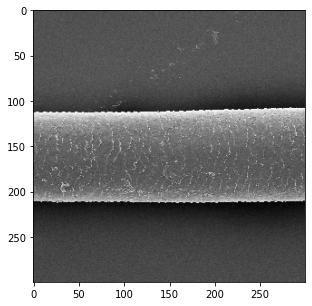

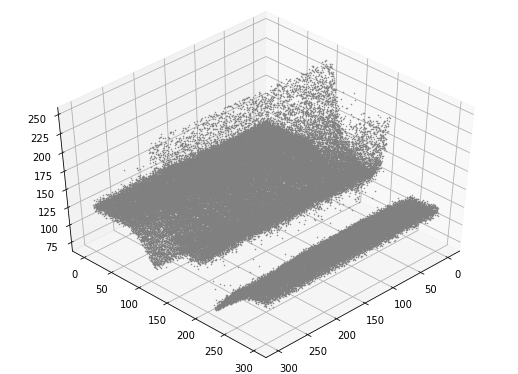

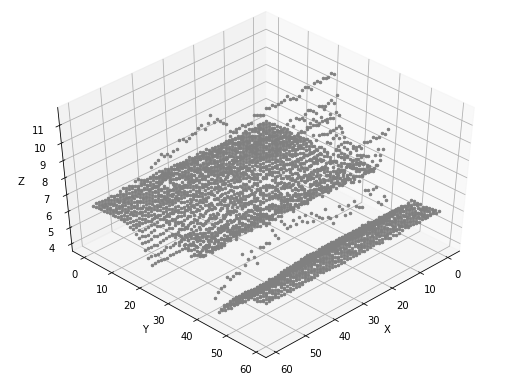

In [ ]:
fukugen = SanjigenFukugen("hair2.bmp", 650, 350,750, 450)
fukugen.print_image(8)
fukugen.make_ravel()
fukugen.print_3D()
fukugen.make_mini(5, 20)

In [ ]:
fukugen.print_2D(15)

100%|██████████| 2048/2048 [00:00<00:00, 30885.71it/s]


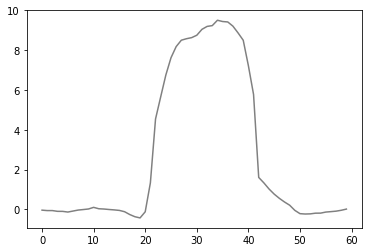

  2%|▏         | 1/60 [00:00<00:49,  1.20it/s]

1 a
60 b



100%|██████████| 16384/16384 [00:00<00:00, 30871.35it/s]


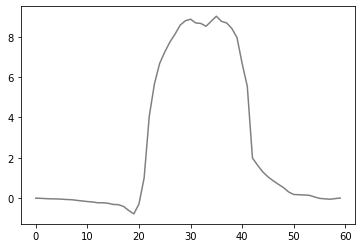

  3%|▎         | 2/60 [00:07<02:34,  2.66s/it]

2 a
60 b



100%|██████████| 2048/2048 [00:00<00:00, 27642.50it/s]


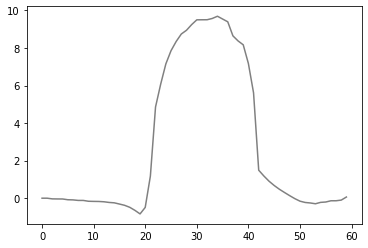

  5%|▌         | 3/60 [00:08<02:01,  2.14s/it]

3 a
60 b



100%|██████████| 4096/4096 [00:00<00:00, 31113.65it/s]


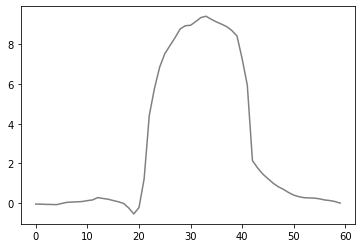

  7%|▋         | 4/60 [00:10<01:51,  2.00s/it]

4 a
60 b



100%|██████████| 16384/16384 [00:00<00:00, 31570.50it/s]


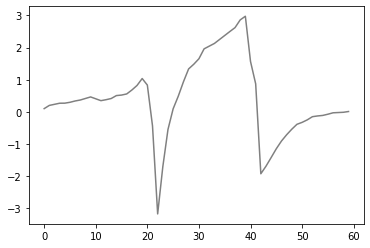

  8%|▊         | 5/60 [00:17<03:08,  3.43s/it]

5 a
60 b



100%|██████████| 16384/16384 [00:00<00:00, 30960.70it/s]


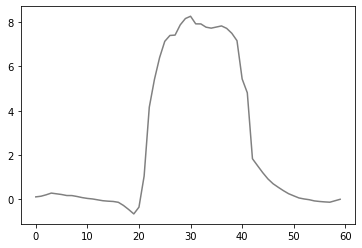

 10%|█         | 6/60 [00:24<04:02,  4.48s/it]

6 a
60 b



100%|██████████| 4096/4096 [00:00<00:00, 30175.43it/s]


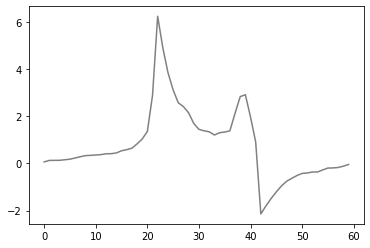

 12%|█▏        | 7/60 [00:25<03:13,  3.66s/it]

7 a
60 b



100%|██████████| 4096/4096 [00:00<00:00, 30537.70it/s]


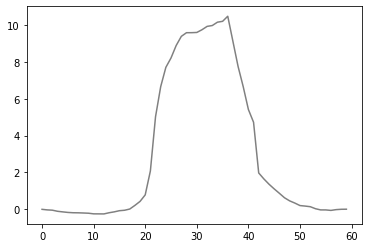

 13%|█▎        | 8/60 [00:27<02:39,  3.06s/it]

8 a
60 b



100%|██████████| 8192/8192 [00:00<00:00, 29183.89it/s]


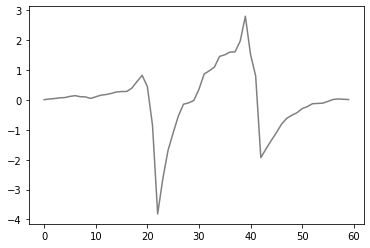

 15%|█▌        | 9/60 [00:30<02:39,  3.12s/it]

9 a
60 b



100%|██████████| 4096/4096 [00:00<00:00, 32031.14it/s]


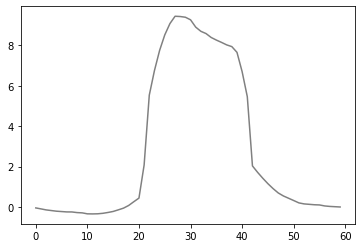

 17%|█▋        | 10/60 [00:32<02:13,  2.67s/it]

10 a
60 b



100%|██████████| 4096/4096 [00:00<00:00, 32104.46it/s]


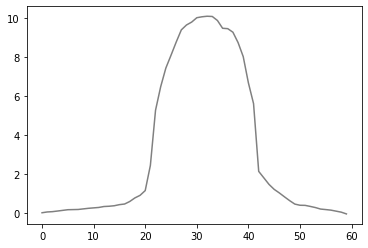

 18%|█▊        | 11/60 [00:34<01:56,  2.37s/it]

11 a
60 b



100%|██████████| 65536/65536 [00:02<00:00, 28444.71it/s]


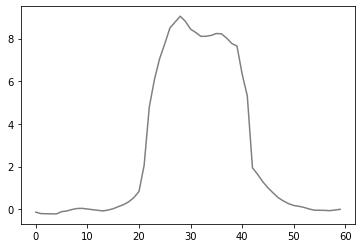

 20%|██        | 12/60 [01:04<08:38, 10.79s/it]

12 a
60 b



100%|██████████| 2048/2048 [00:00<00:00, 32799.28it/s]


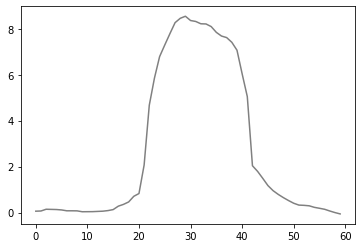

 22%|██▏       | 13/60 [01:05<06:10,  7.88s/it]

13 a
60 b



100%|██████████| 2048/2048 [00:00<00:00, 33611.02it/s]


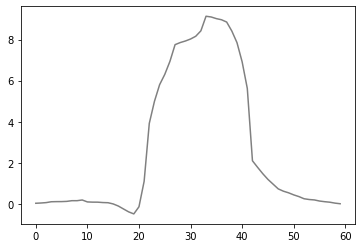

 23%|██▎       | 14/60 [01:06<04:25,  5.77s/it]

14 a
60 b



100%|██████████| 2048/2048 [00:00<00:00, 33222.47it/s]


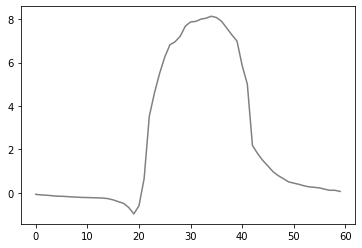

 25%|██▌       | 15/60 [01:07<03:13,  4.29s/it]

15 a
60 b



100%|██████████| 1024/1024 [00:00<00:00, 30570.69it/s]


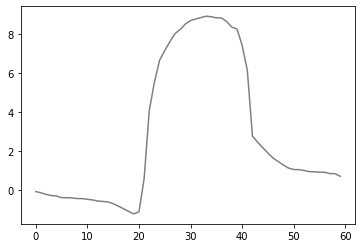

 27%|██▋       | 16/60 [01:07<02:18,  3.14s/it]

16 a
60 b



100%|██████████| 2048/2048 [00:00<00:00, 31931.66it/s]


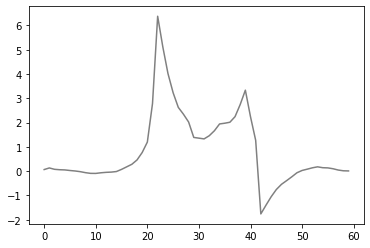

 28%|██▊       | 17/60 [01:08<01:46,  2.47s/it]

17 a
60 b



100%|██████████| 4096/4096 [00:00<00:00, 32046.79it/s]


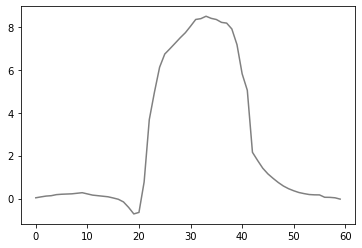

 30%|███       | 18/60 [01:10<01:33,  2.22s/it]

18 a
60 b



100%|██████████| 4096/4096 [00:00<00:00, 27721.63it/s]


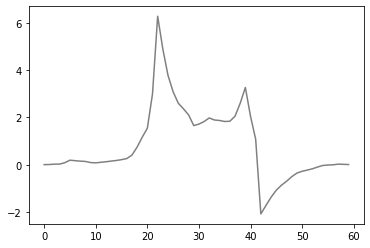

 32%|███▏      | 19/60 [01:11<01:24,  2.06s/it]

19 a
60 b



100%|██████████| 2048/2048 [00:00<00:00, 33083.64it/s]


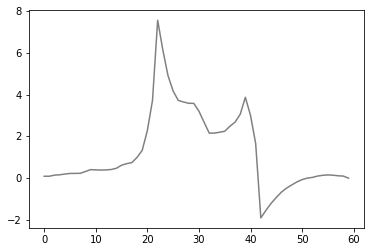

100%|██████████| 512/512 [00:00<00:00, 26116.84it/s]

20 a
60 b


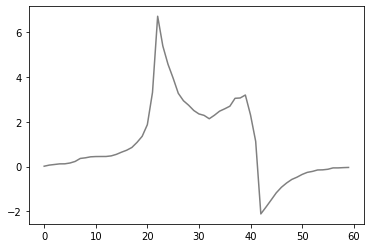

 35%|███▌      | 21/60 [01:13<00:49,  1.27s/it]

21 a
60 b



100%|██████████| 2048/2048 [00:00<00:00, 32876.11it/s]


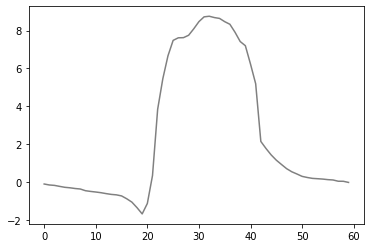

 37%|███▋      | 22/60 [01:14<00:45,  1.21s/it]

22 a
60 b



100%|██████████| 4096/4096 [00:00<00:00, 31959.57it/s]


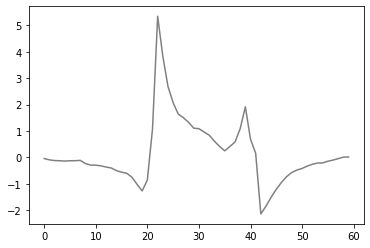

 38%|███▊      | 23/60 [01:15<00:49,  1.33s/it]

23 a
60 b



100%|██████████| 1024/1024 [00:00<00:00, 28989.49it/s]


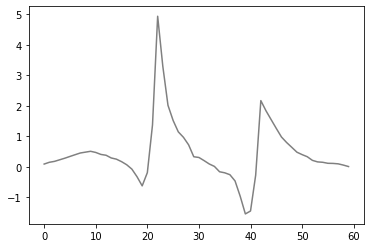

 40%|████      | 24/60 [01:16<00:39,  1.09s/it]

24 a
60 b



100%|██████████| 16384/16384 [00:00<00:00, 27662.93it/s]


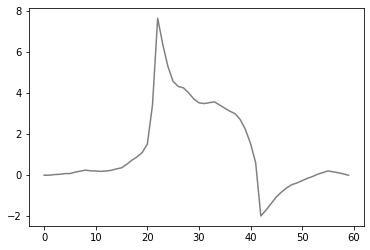

 42%|████▏     | 25/60 [01:23<01:38,  2.82s/it]

25 a
60 b



100%|██████████| 2048/2048 [00:00<00:00, 27385.35it/s]


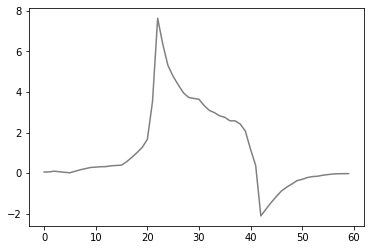

 43%|████▎     | 26/60 [01:24<01:16,  2.25s/it]

26 a
60 b



100%|██████████| 8192/8192 [00:00<00:00, 31255.16it/s]


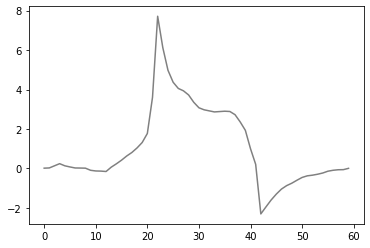

 45%|████▌     | 27/60 [01:27<01:25,  2.58s/it]

27 a
60 b



100%|██████████| 4096/4096 [00:00<00:00, 32083.66it/s]


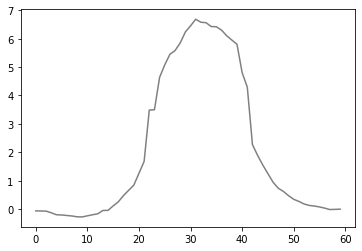

 47%|████▋     | 28/60 [01:29<01:13,  2.30s/it]

28 a
60 b



100%|██████████| 8192/8192 [00:00<00:00, 32176.11it/s]


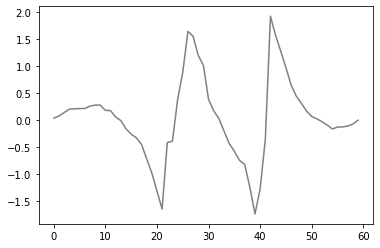

 48%|████▊     | 29/60 [01:32<01:20,  2.60s/it]

29 a
60 b



100%|██████████| 4096/4096 [00:00<00:00, 31431.46it/s]


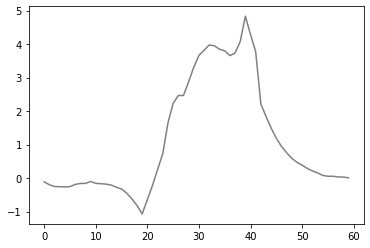

 50%|█████     | 30/60 [01:33<01:09,  2.33s/it]

30 a
60 b



100%|██████████| 16384/16384 [00:00<00:00, 30494.01it/s]


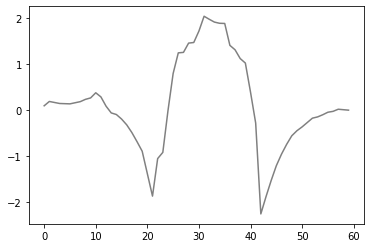

 52%|█████▏    | 31/60 [01:40<01:46,  3.66s/it]

31 a
60 b



100%|██████████| 4096/4096 [00:00<00:00, 32983.98it/s]


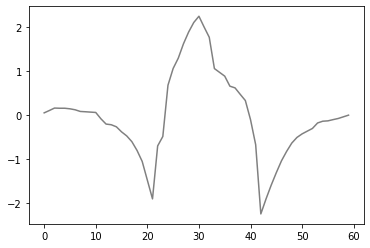

 53%|█████▎    | 32/60 [01:42<01:26,  3.10s/it]

32 a
60 b



100%|██████████| 2048/2048 [00:00<00:00, 32586.76it/s]


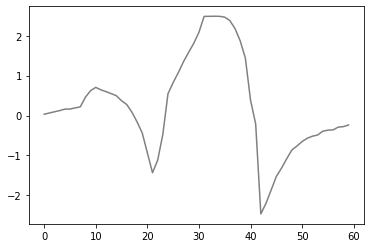

 55%|█████▌    | 33/60 [01:43<01:05,  2.43s/it]

33 a
60 b



100%|██████████| 2048/2048 [00:00<00:00, 33140.44it/s]


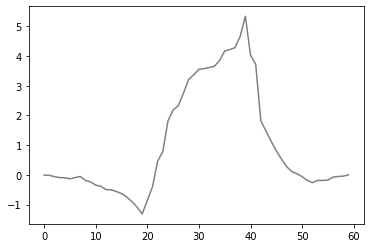

 57%|█████▋    | 34/60 [01:44<00:50,  1.95s/it]

34 a
60 b



100%|██████████| 1024/1024 [00:00<00:00, 27764.10it/s]


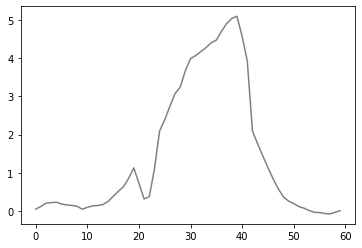

 58%|█████▊    | 35/60 [01:44<00:38,  1.54s/it]

35 a
60 b



100%|██████████| 4096/4096 [00:00<00:00, 32459.49it/s]


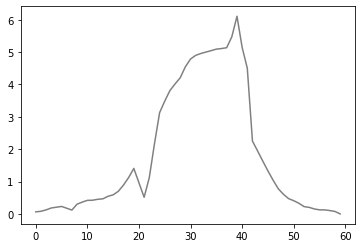

 60%|██████    | 36/60 [01:46<00:37,  1.55s/it]

36 a
60 b



100%|██████████| 2048/2048 [00:00<00:00, 31731.83it/s]


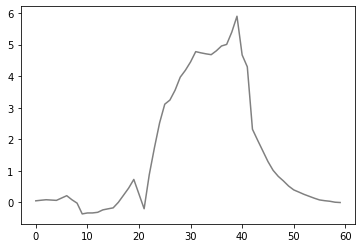

100%|██████████| 512/512 [00:00<00:00, 26449.12it/s]

37 a
60 b


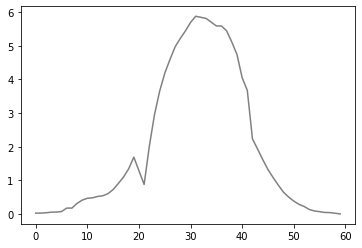

 63%|██████▎   | 38/60 [01:47<00:23,  1.05s/it]

38 a
60 b



100%|██████████| 4096/4096 [00:00<00:00, 32159.99it/s]


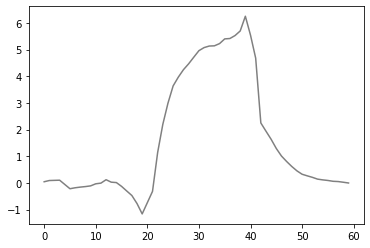

 65%|██████▌   | 39/60 [01:49<00:25,  1.23s/it]

39 a
60 b



100%|██████████| 2048/2048 [00:00<00:00, 32541.70it/s]


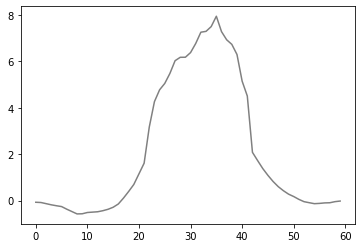

 67%|██████▋   | 40/60 [01:50<00:23,  1.19s/it]

40 a
60 b



100%|██████████| 2048/2048 [00:00<00:00, 32745.14it/s]


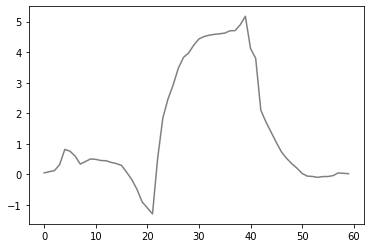

 68%|██████▊   | 41/60 [01:51<00:20,  1.09s/it]

41 a
60 b



100%|██████████| 1024/1024 [00:00<00:00, 29153.21it/s]


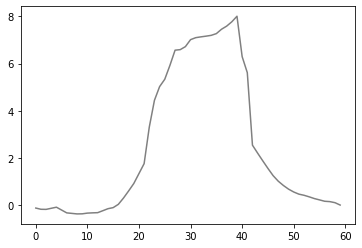

 70%|███████   | 42/60 [01:51<00:16,  1.10it/s]

42 a
60 b



100%|██████████| 1024/1024 [00:00<00:00, 27349.86it/s]


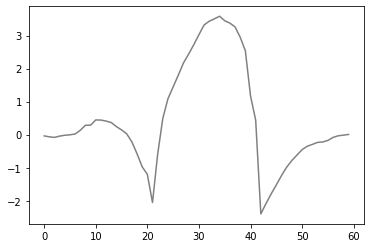

100%|██████████| 512/512 [00:00<00:00, 26608.06it/s]

43 a
60 b


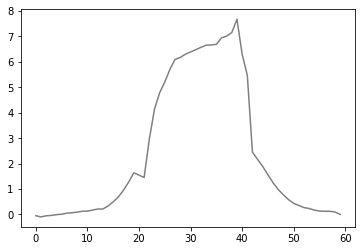

 73%|███████▎  | 44/60 [01:52<00:10,  1.53it/s]

44 a
60 b



100%|██████████| 4096/4096 [00:00<00:00, 32182.22it/s]


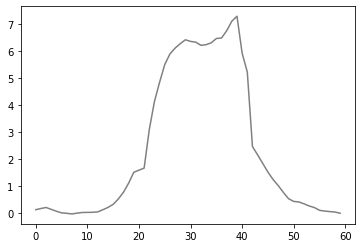

100%|██████████| 256/256 [00:00<00:00, 20549.30it/s]

45 a
60 b


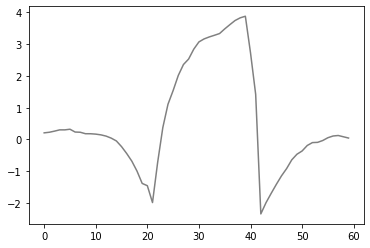

 77%|███████▋  | 46/60 [01:54<00:10,  1.36it/s]

46 a
60 b



100%|██████████| 1024/1024 [00:00<00:00, 21515.82it/s]


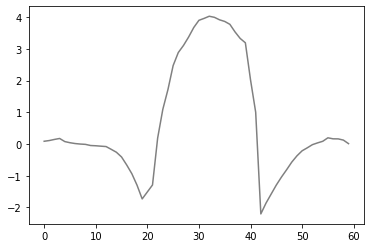

 78%|███████▊  | 47/60 [01:54<00:08,  1.52it/s]

47 a
60 b



100%|██████████| 1024/1024 [00:00<00:00, 31343.72it/s]


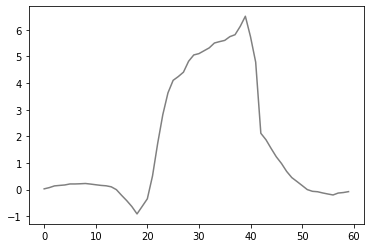

 80%|████████  | 48/60 [01:55<00:07,  1.60it/s]

48 a
60 b



100%|██████████| 2048/2048 [00:00<00:00, 33604.97it/s]


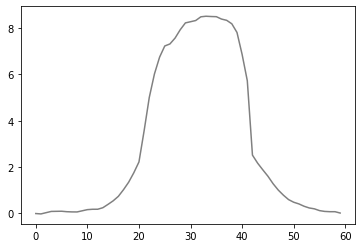

 82%|████████▏ | 49/60 [01:56<00:07,  1.44it/s]

49 a
60 b



100%|██████████| 2048/2048 [00:00<00:00, 31523.85it/s]


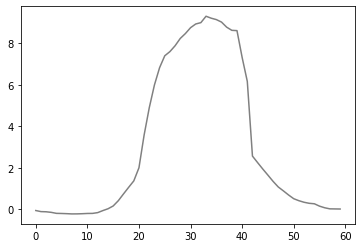

 83%|████████▎ | 50/60 [01:57<00:07,  1.34it/s]

50 a
60 b



100%|██████████| 4096/4096 [00:00<00:00, 31708.00it/s]


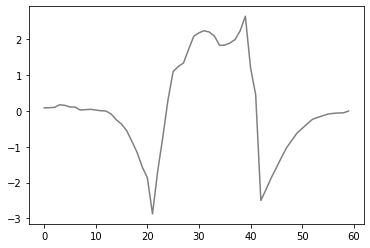

 85%|████████▌ | 51/60 [01:58<00:09,  1.02s/it]

51 a
60 b



100%|██████████| 4096/4096 [00:00<00:00, 32312.06it/s]


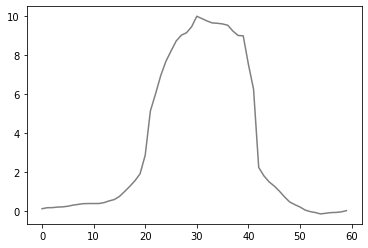

 87%|████████▋ | 52/60 [02:00<00:09,  1.24s/it]

52 a
60 b



100%|██████████| 8192/8192 [00:00<00:00, 32067.97it/s]


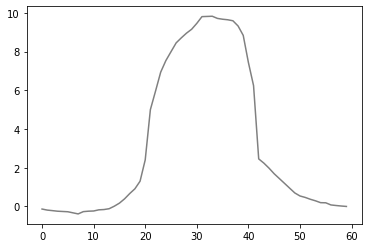

 88%|████████▊ | 53/60 [02:03<00:13,  1.86s/it]

53 a
60 b



100%|██████████| 2048/2048 [00:00<00:00, 31491.03it/s]


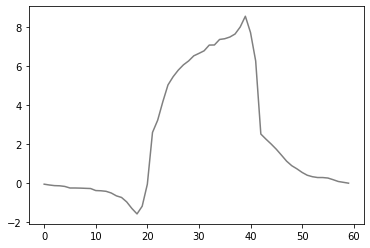

 90%|█████████ | 54/60 [02:04<00:09,  1.57s/it]

54 a
60 b



100%|██████████| 2048/2048 [00:00<00:00, 29661.17it/s]


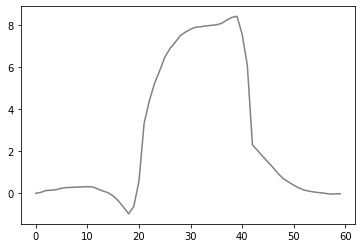

 92%|█████████▏| 55/60 [02:05<00:06,  1.37s/it]

55 a
60 b



100%|██████████| 512/512 [00:00<00:00, 28662.16it/s]


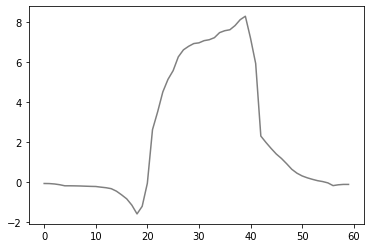

 93%|█████████▎| 56/60 [02:06<00:04,  1.08s/it]

56 a
60 b



100%|██████████| 4096/4096 [00:00<00:00, 31872.59it/s]


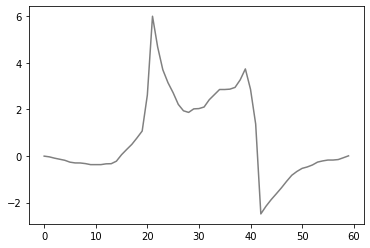

 95%|█████████▌| 57/60 [02:07<00:03,  1.24s/it]

57 a
60 b



100%|██████████| 1024/1024 [00:00<00:00, 28894.90it/s]


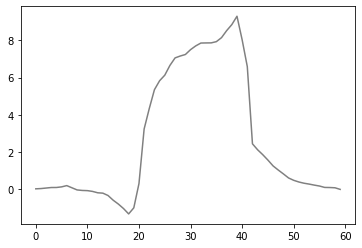

100%|██████████| 256/256 [00:00<00:00, 20721.01it/s]

58 a
60 b


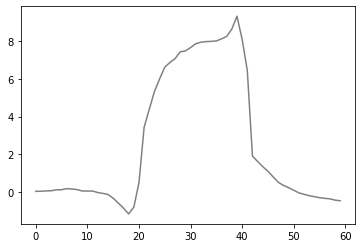

 98%|█████████▊| 59/60 [02:08<00:00,  1.27it/s]

59 a
60 b



100%|██████████| 8192/8192 [00:00<00:00, 32434.64it/s]


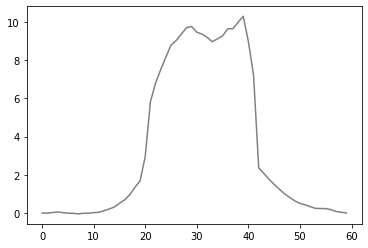

100%|██████████| 60/60 [02:11<00:00,  2.20s/it]

60 a
60 b


In [ ]:
fukugen.make_answer()

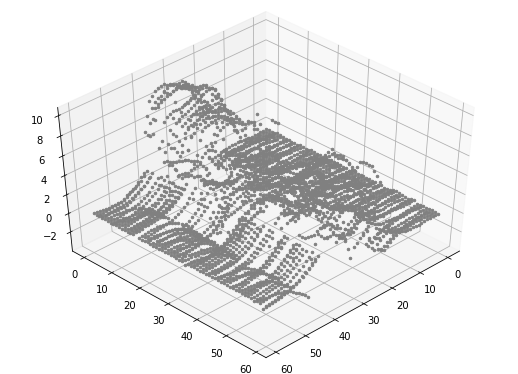

In [ ]:
fukugen.print_Last(45,45)

In [ ]:
fukugen.make_STL_Last(-5)

In [ ]:
make_stl(Z_Z, -2, 20, 20)

NameError: ignored